In [854]:
#Imports
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm



SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [855]:
#normlalizing the background to 15 mins and spits out the bkg data
def bkgNormalize(filename, bin_num = 50):
    #1 hour runs, need to be devided by 4 to make it 15 
    df = pd.read_csv(filename) #creates a dataframe of the csv
    data = np.array(df["Area"])
    counts, bins = np.histogram(data, bins = bin_num) 
    #counts is the number of counts that each has 
    #bins is the bounds of the bins

    norm_counts = []
    
    for i in counts:
        norm_counts.append(i//4)
        
    return norm_counts, bins



#takes the bkg data and subtracts from observed data
def bkgSubtractedData(filename, bkg_counts, bkg_bins, bin_num = 50):
    obs_data = histData(filename) #raw observed data from run
    obs_counts, obs_bins = np.histogram(obs_data, bins = bin_num)
    
    
#     diff = obs_counts - bkg_counts
#     if diff < 0:
#         sub
#     sub_counts = abs(obs_counts - bkg_counts)

    
    #if the background is higher than the observed then the keep the observed.. 
    sub_counts = []

    for k in range(len(obs_counts)):
        diff = obs_counts[k] - bkg_counts[k]
        if diff < 0:
            sub_counts.append(obs_counts[k])
        else:
            sub_counts.append(diff)
            
    
#     print("obs - bkg = subtracted")
#     for i in range(len(sub_counts)):
#         print(obs_counts[i], "-", bkg_counts[i], "=", sub_counts[i])
    plt.figure(figsize = (8,7))

#     plt.bar(obs_bins[:-1], sub_counts,
#             width=(obs_bins[1]-obs_bins[0]), color='cornflowerblue', label ="Background subtracted Data")
    plt.hist(obs_data, bins= bin_num, alpha = 0.5, color = "gray", label ="observed Data")
    
    plt.bar(bkg_bins[:-1], bkg_counts,
            width=(bkg_bins[1]-bkg_bins[0]), color='pink', label ="Background Data")


    plt.title("Subtraced background graph: " + filename )
    plt.xlabel("Area of Signal [Vs]")
    plt.ylabel("Counts")
    plt.legend()
    plt.show()

In [906]:
def VStoC(data):
    c_data = []
    for i in data:
        c_data.append(i/50) #VS/ohm
    return c_data


#plotting a histogram quickly from the .csv file
def plotHistFromCsv(filename, bin_num = 50):
    df = pd.read_csv(filename) #creates a dataframe of the csv
    d = np.array(df["Area"])
    data = VStoC(d)
    plt.figure(figsize = (10,5))
#     hist, bins = np.histogram(data, bins = 30)
    plt.hist(data, bins = bin_num) #alpha- transperency, range - range of the graph 
    plt.title(filename)
    plt.xlabel("Charge [C]")
    plt.ylabel("Counts")
    plt.show()
    


#plotting a histogram from the data given it.    
def plotHist(data, name, bin_num = 50): #name is for the title of the graph
    plt.figure(figsize = (10,5))
#     hist, bins = np.histogram(data, bins = 30)
    plt.hist(data, bins = bin_num) #alpha- transperency, range - range of the graph 
    plt.title(name)
    plt.xlabel("Charge [C]")
    plt.ylabel("Counts")
    plt.show()



#getting just the data from a csv file
def histData(filename, lowlim = -10, uplim = 10):
    df = pd.read_csv(filename) #creates a dataframe of the csv
    d = np.array(df["Area"])
    data = VStoC(d) #this array can be used to fit a normal distribution
    trunc_data = [] #data with the lower limt applied, if nothing specified, all values will be taken 
    for i in data:
        if i >= lowlim and i <= uplim:
            trunc_data.append(i)
    return trunc_data

#find the idx of the value given in a list
def idxFind(lst, value):
    idx = -1
    
    for i in range(len(lst)):
        if value == lst[i]:
            idx = i
            return idx

#finding the energy resolution from the data given with the graph x limits
def normData(data, lowlim, uplim , filename,bin_num = 50):
    mean,std=norm.fit(data)
    x = np.linspace(lowlim, uplim, 1000)
    y = norm.pdf(x, mean, std)
    plt.figure(figsize = (10,8))
    plt.hist(data, bins = bin_num, normed = True, alpha = 0.4,color = "cornflowerblue")
    plt.plot(x,y, c = "blue")
    
    
    #looking for the peak 
    peak = 0
    peak_area = 0
    ind = 0
    for i in range(len(x)):
        if y[i] >= peak:
            peak = y[i]
        else:
            peak = y[i-1] #this is the peak value, because function decreases after that
            peak_area = x[i]
            ind =i-1 #the index of the peak value
            break
#     plt.scatter(x[ind], y[ind], c ="R")
    halfmax = peak/2
    x_hlf = np.linspace(lowlim, uplim, 1000)
    y_hlf = [halfmax]*1000
#     plt.plot(x_hlf, y_hlf) #plotting the line that goes throughhalf of the graph
    
    closest_dist = 0
    firsthlf_dist = []
    sechlf_dist = []
    for i in range(len(y)):
        if i <= ind:
            firsthlf_dist.append(abs(y[i]-halfmax))
            
        
        if i > ind:
            sechlf_dist.append(abs(y[i]-halfmax))
            
    left_idx = idxFind(firsthlf_dist, min(firsthlf_dist))
    right_idx = idxFind(sechlf_dist, min(sechlf_dist))
            
#     print(left_idx, right_idx)
#     plt.scatter(x[left_idx], y[left_idx], c ="g") #plotting the left intersect
    
#     plt.scatter(x[right_idx+ind], y[right_idx+ ind], c ="g") #plotting the right intersect 
    plt.title(filename)
    annot = "Peak X-value: " + "{:.2e}".format(x[ind])
    plt.annotate(annot, xy=(0.05, 0.9), xycoords='axes fraction')
    plt.xlabel("Charge [C]")
    plt.ylabel("Normalized Counts")
#     plt.xlim(-7e-8,-1.75e-9)

    plt.show()
    
    fullwidth = abs( x[right_idx+ind]- x[left_idx])
    
#     base_area = -2.6304304304304305e-09 #1300v peak
    
#     area_peak = x[ind]
#     alpha = area_peak/base_area

    
    
    resolution = fullwidth / x[ind] #*alpha
    print(filename, "peak:",x[ind], "fwhm:", fullwidth, "resolution:", resolution)
    
    return abs(resolution), fullwidth, x[ind]




    
    
 

1700v-a.csv


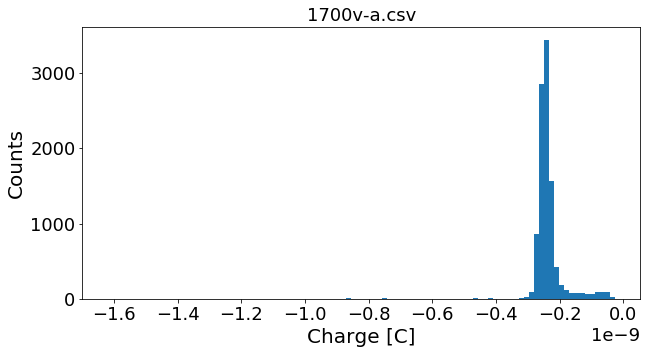

/Users/faith/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


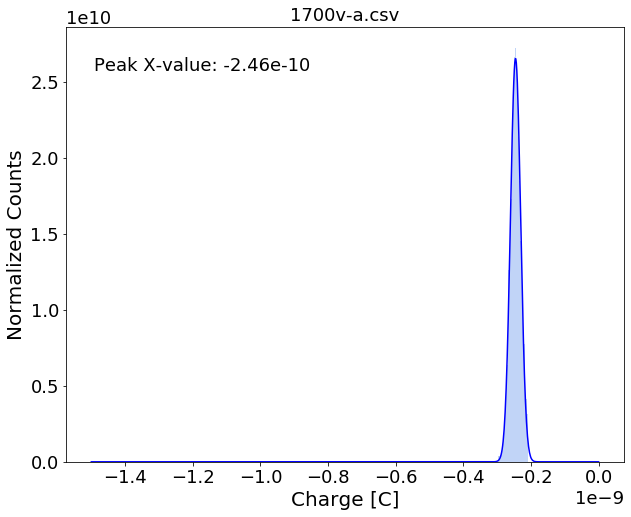

1700v-a.csv peak: -2.462462462462462e-10 fwhm: 3.303303303303297e-11 resolution: -0.1341463414634144
1750v-a.csv


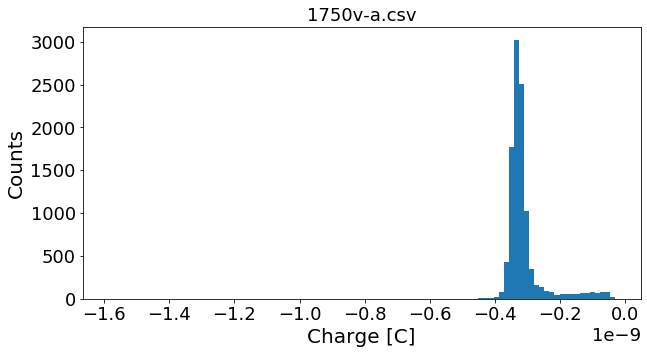

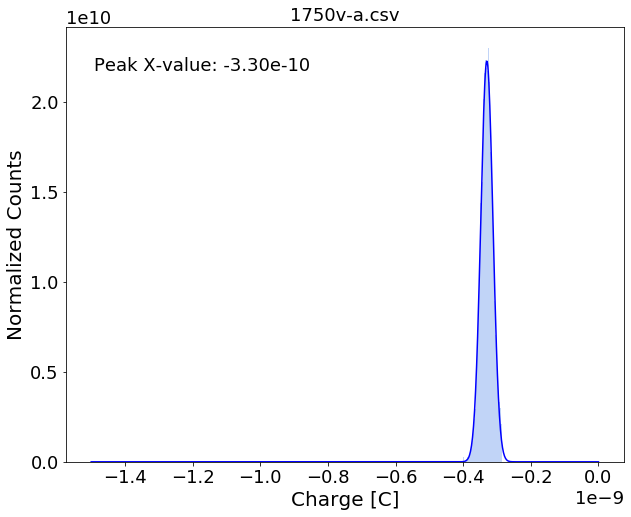

1750v-a.csv peak: -3.303303303303303e-10 fwhm: 4.054054054054048e-11 resolution: -0.12272727272727256
1800v-a.csv


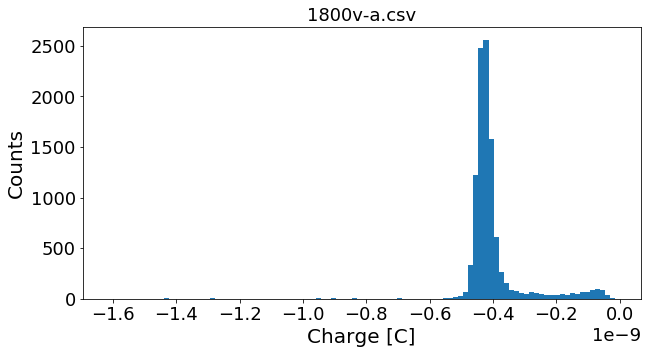

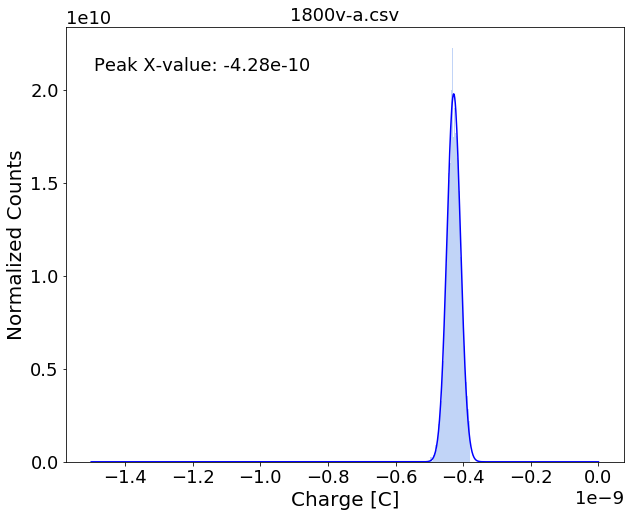

1800v-a.csv peak: -4.2792792792792794e-10 fwhm: 4.654654654654653e-11 resolution: -0.10877192982456135
1850v-a.csv


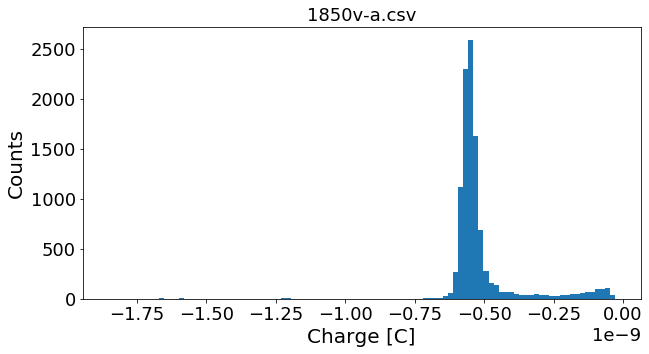

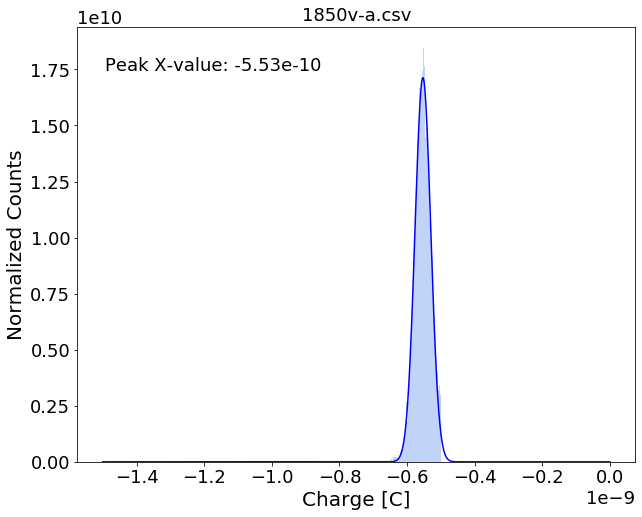

1850v-a.csv peak: -5.525525525525525e-10 fwhm: 5.405405405405404e-11 resolution: -0.09782608695652173
1900v-a.csv


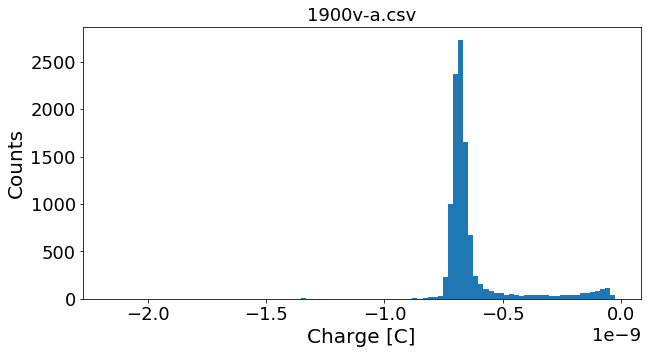

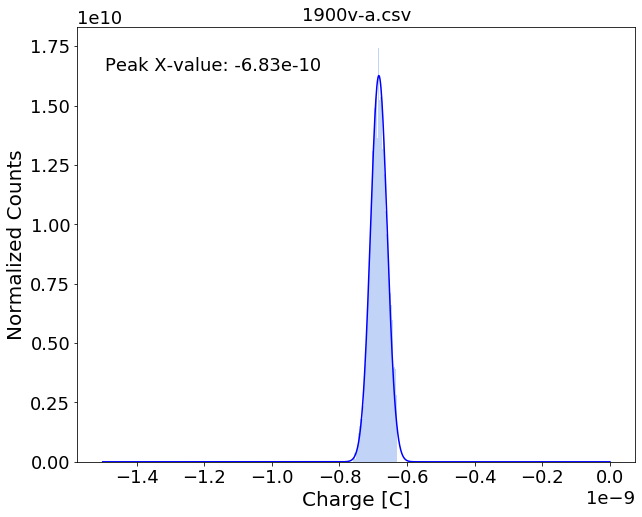

1900v-a.csv peak: -6.831831831831831e-10 fwhm: 5.5555555555555605e-11 resolution: -0.0813186813186814
1950v-a.csv


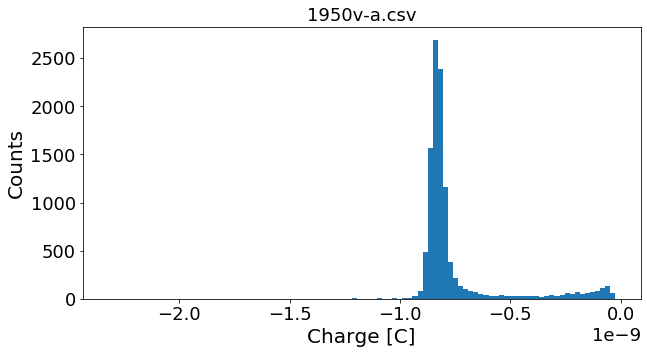

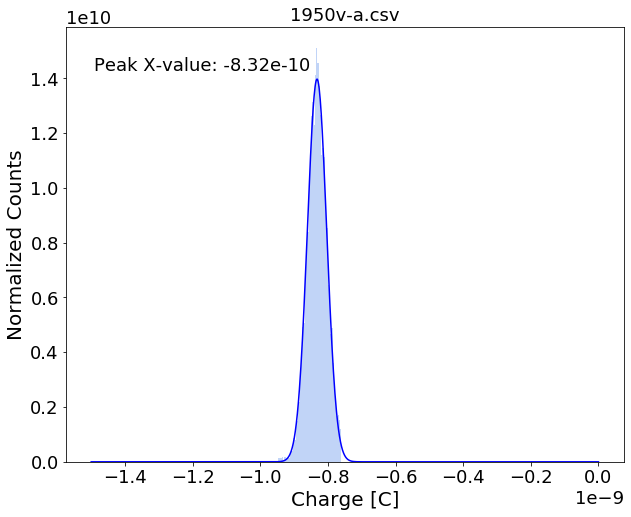

1950v-a.csv peak: -8.318318318318318e-10 fwhm: 6.606606606606604e-11 resolution: -0.07942238267148012
2000v-a.csv


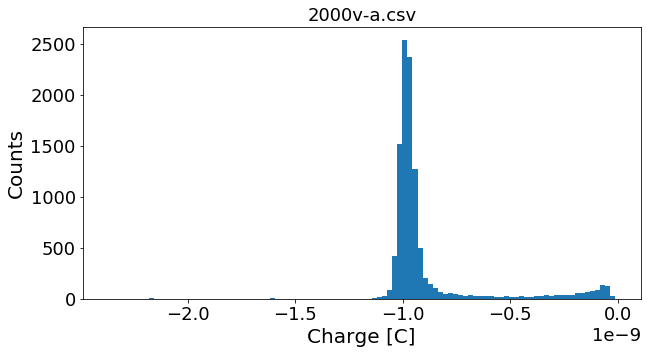

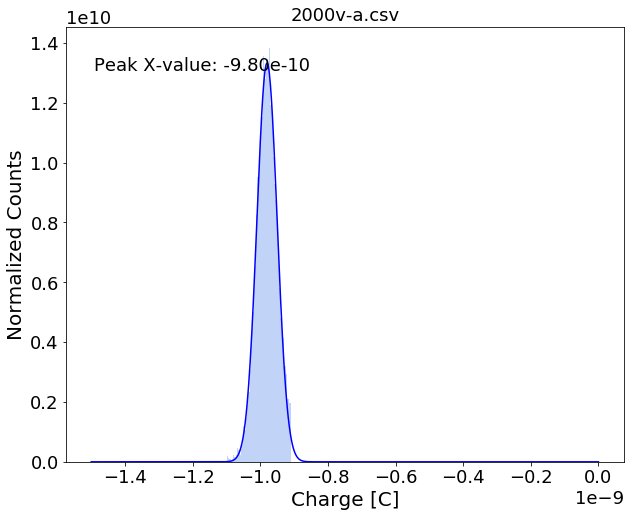

2000v-a.csv peak: -9.804804804804804e-10 fwhm: 6.906906906906886e-11 resolution: -0.07044410413476242
2050v-a.csv


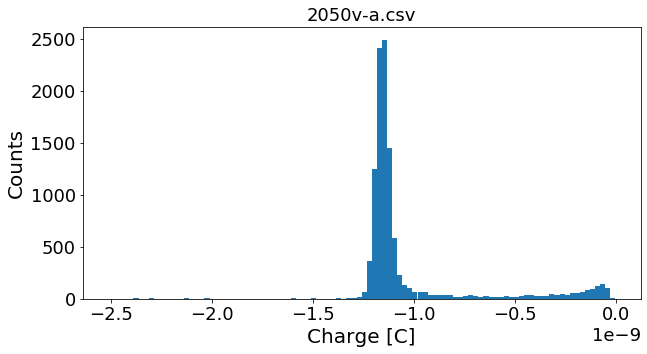

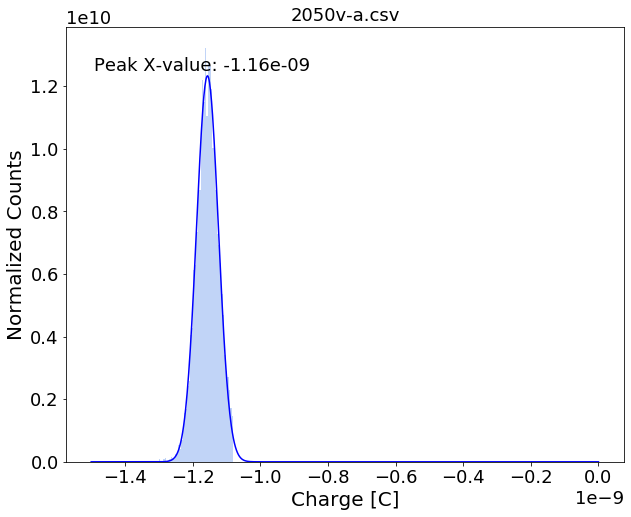

2050v-a.csv peak: -1.1561561561561561e-09 fwhm: 7.357357357357365e-11 resolution: -0.06363636363636371
2100v-a.csv


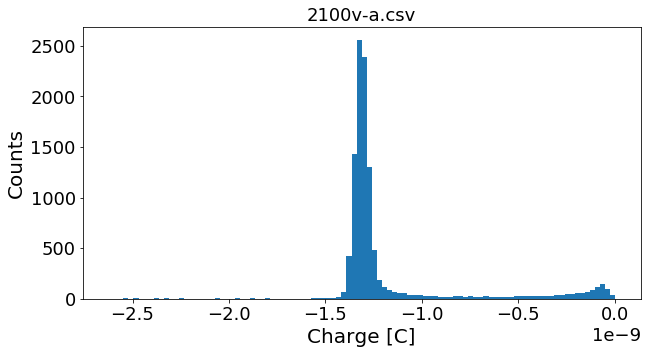

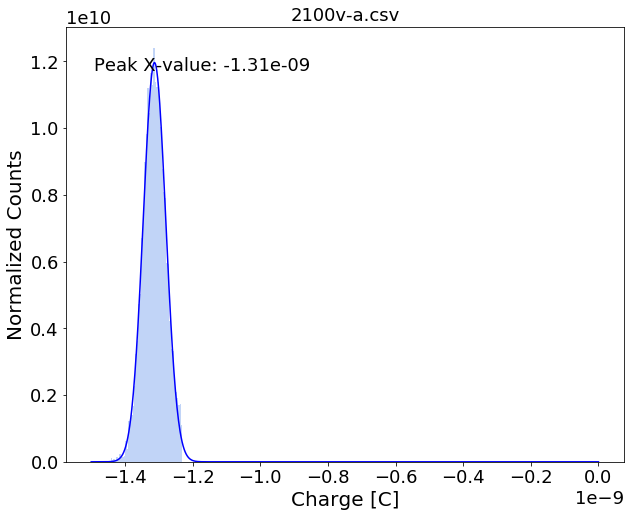

No handles with labels found to put in legend.


2100v-a.csv peak: -1.3123123123123124e-09 fwhm: 7.657657657657657e-11 resolution: -0.058352402745995416


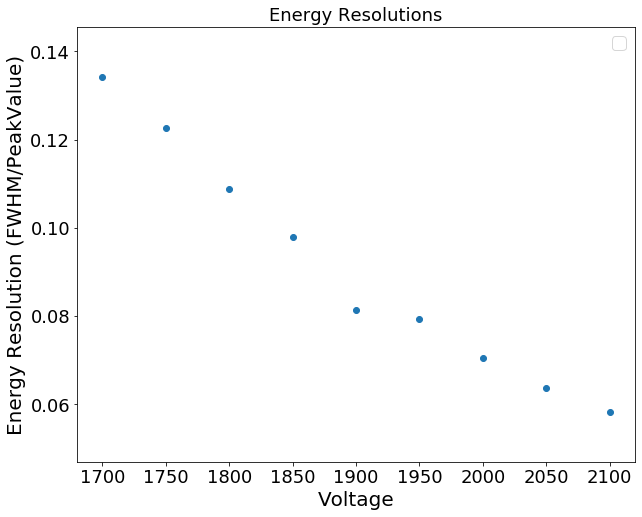

<Figure size 432x288 with 0 Axes>

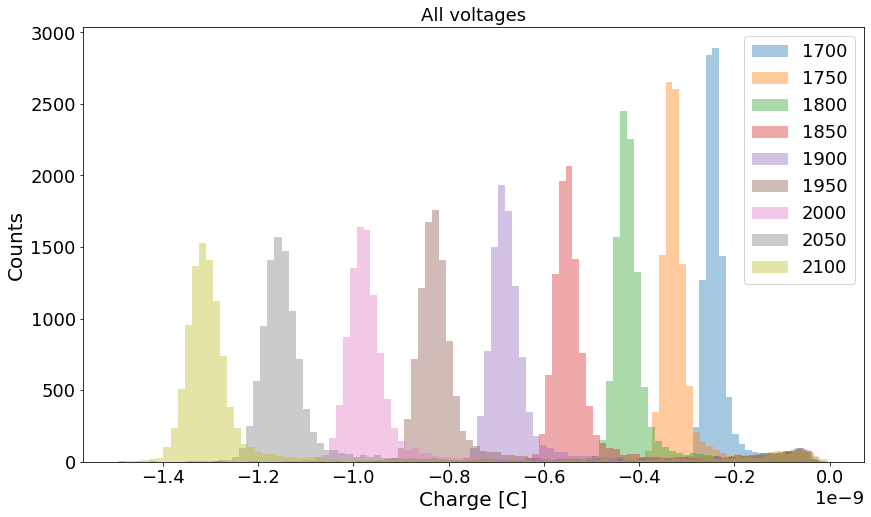

In [908]:
#left the PMT on all day and 1700 - 2100 in 50V steps
data_allday = histData("1700v-a.csv", lowlim = -0.5e-9)
data_1 = histData("1700v-a-1.csv", lowlim = -0.5e-9)
data_2 = histData("1700v-a-2.csv", lowlim = -0.5e-9)
data_3 = histData("1700v-a-3.csv", lowlim = -0.5e-9)

# plt.figure(figsize = (10,8))
# plt.hist(data_allday, bins = 100, label ="allday", alpha = 0.4) #alpha- transperency, range - range of the graph 
# plt.hist(data_1, bins = 100, label ="1", alpha = 0.4) #alpha- transperency, range - range of the graph 
# plt.hist(data_2, bins = 100, label ="2", alpha = 0.4) #alpha- transperency, range - range of the graph 
# plt.hist(data_3, bins = 100, label ="3", alpha = 0.4) #alpha- transperency, range - range of the graph 

# plt.title("Different Measurements of 1700v with differening warm up times")
# plt.xlabel("Charge [C]")
# plt.ylabel("Counts")
# plt.legend()
# plt.show()
reses_allday = []

lowlims = [-3e-10, #1700
          -4e-10, #1750
          -5e-10, #1800
          -6.5e-10, #1850
          -7.6e-10, #1900
          -9.5e-10, #1950
          -1.1e-9, #2000
          -1.3e-9, #2050
          -1.45e-9] #2100


uplims = [-2.1e-10,#1700
         -2.85e-10, #1750
         -3.8e-10, #1800
         -5e-10, #1850
         -6.3e-10, #1900
         -7.6e-10, #1950
         -9.1e-10, #2000
         -1.08e-9, #2050
         -1.23e-9] #2100

tot_low = -1.5e-9
tot_up = 0

for i in range(0,9):
    num = 1700 + 50*i
    filename = str(num) + "v-a.csv"
    print(filename)
    plotHistFromCsv(filename, bin_num =100)
    
    tr_data = histData(filename, lowlims[i], uplims[i])
#     plotHist(tr_data, filename, 50)
    
    res, fw, peak = normData(tr_data,tot_low, tot_up,  filename, 50)
    
    reses_allday.append(res)
 
#correct indents
plt.figure(figsize = (10,8))
plt.scatter([1700, 1750, 1800, 1850, 1900, 1950, 2000,2050, 2100], reses_allday)

plt.title("Energy Resolutions")
plt.xlabel("Voltage")
plt.ylabel("Energy Resolution (FWHM/PeakValue)")
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize = (14,8))
for i in range(0,9):
    num = 1700 + 50*i
    filename = str(num) + "v-a.csv"
#     print(filename)
#     plotHistFromCsv(filename, bin_num =100)
    
    tr_data = histData(filename, tot_low, tot_up)
    plt.hist(tr_data, bins = 100, label = num , alpha = 0.4) #alpha- transperency, range - range of the graph 
    
plt.title("All voltages")
plt.xlabel("Charge [C]")
plt.ylabel("Counts")
plt.legend()
plt.show()


    



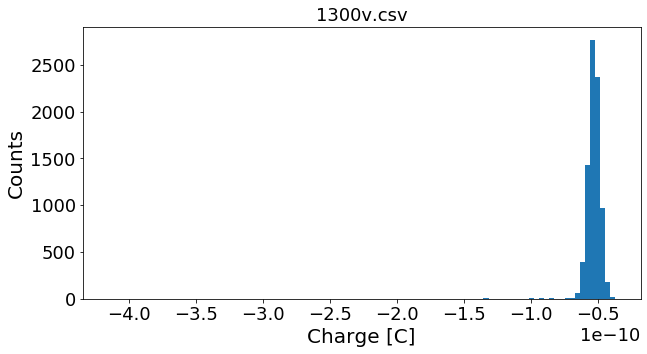

8203


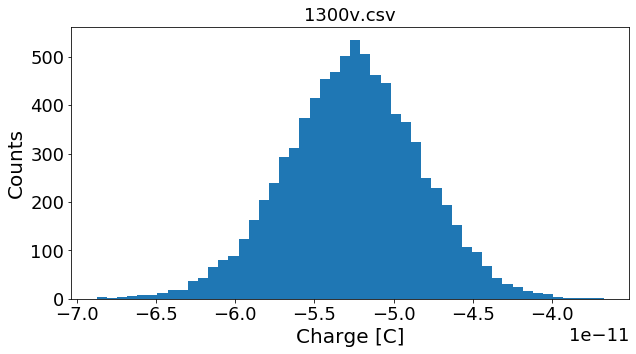

/Users/faith/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


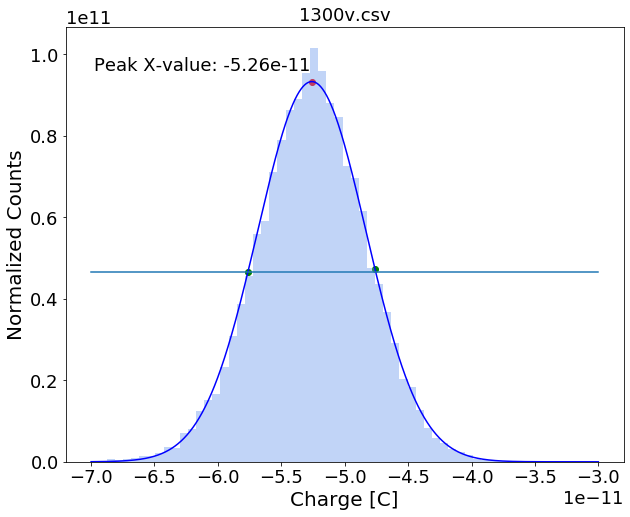

1300v.csv peak: -5.2582582582582587e-11 fwhm: 1.0010010010010015e-11 resolution: -0.19036740909956223


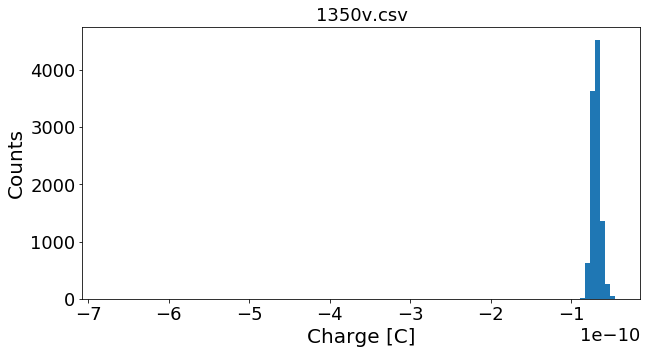

10292


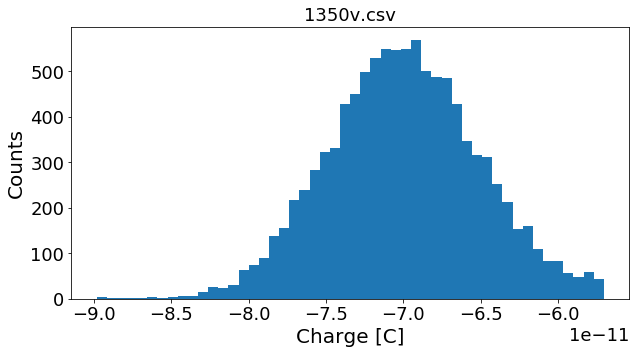

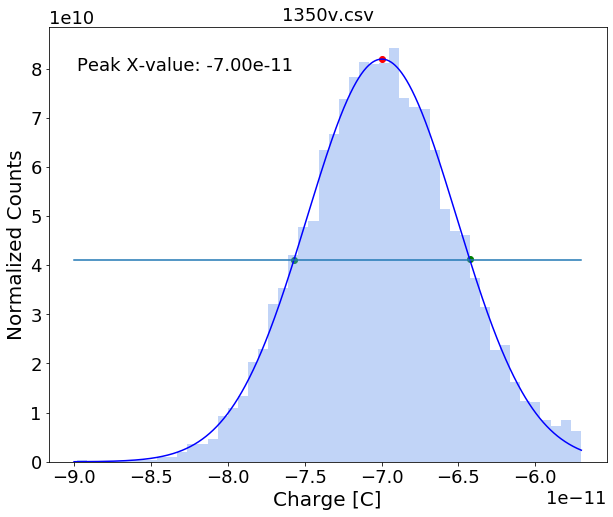

1350v.csv peak: -6.998198198198198e-11 fwhm: 1.1429429429429438e-11 resolution: -0.16331960178510138


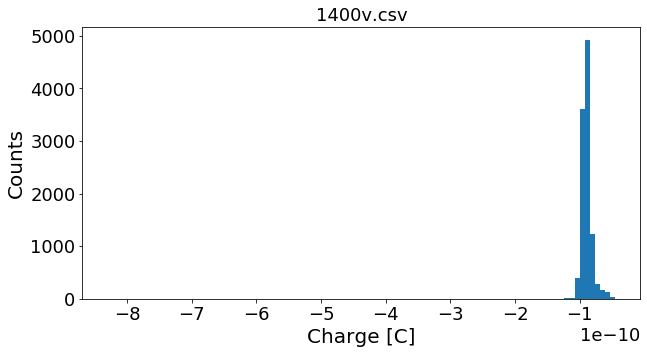

10054


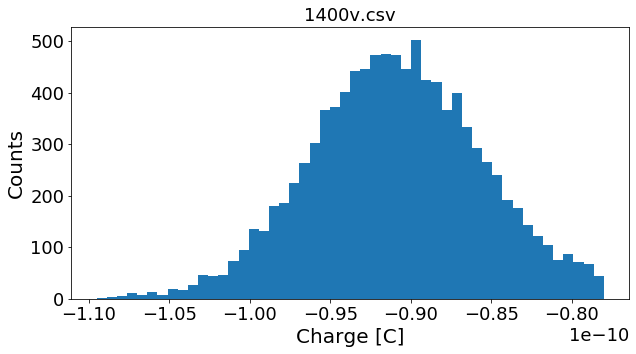

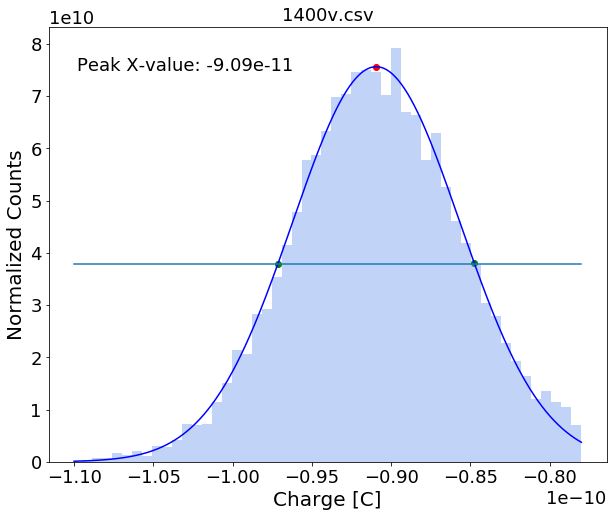

1400v.csv peak: -9.094094094094094e-11 fwhm: 1.2396396396396392e-11 resolution: -0.1363126031920748


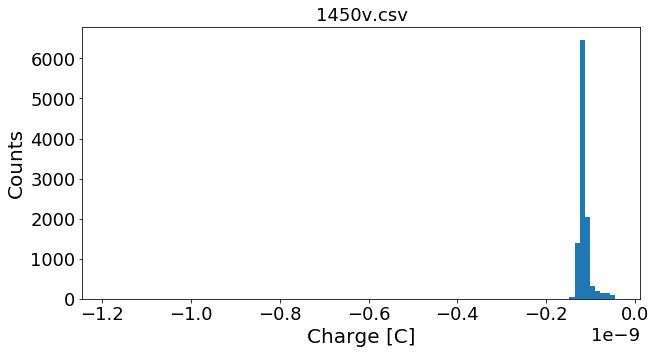

9696


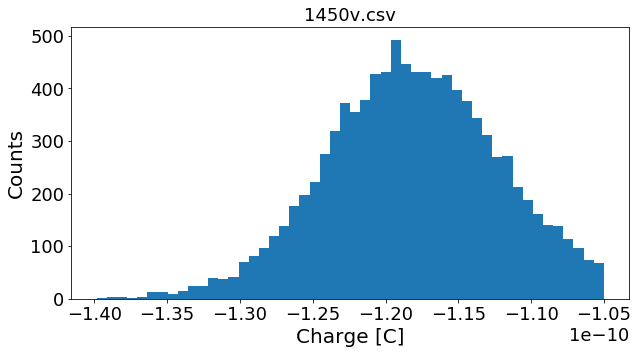

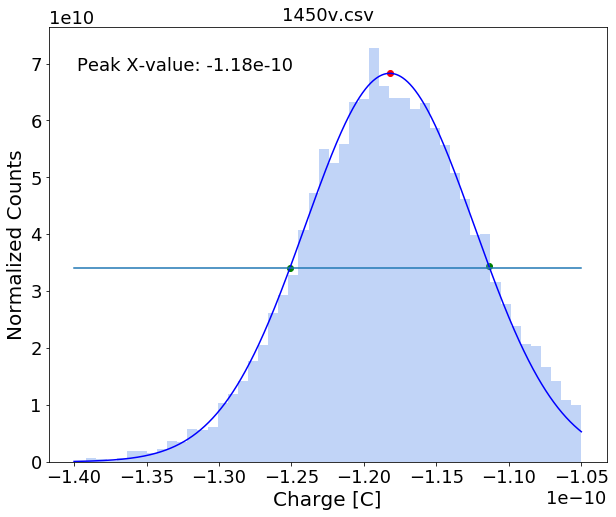

1450v.csv peak: -1.182082082082082e-10 fwhm: 1.3733733733733738e-11 resolution: -0.11618257261410792


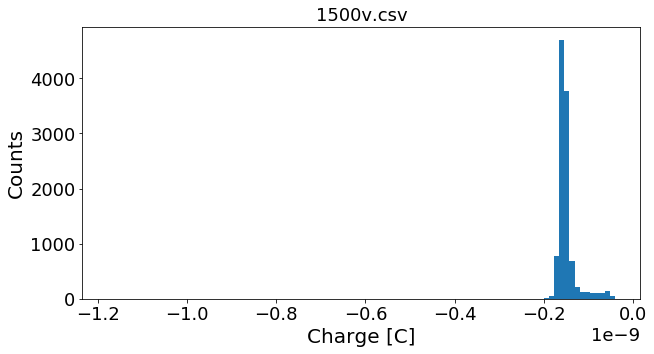

9722


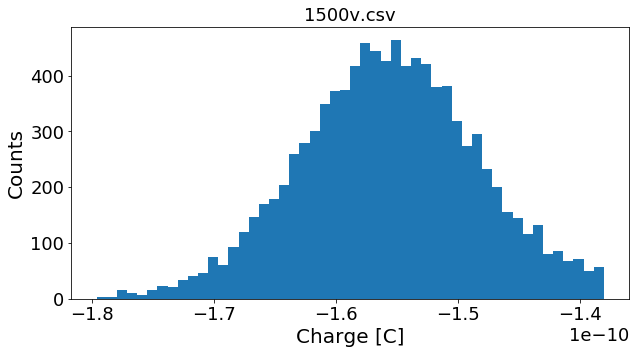

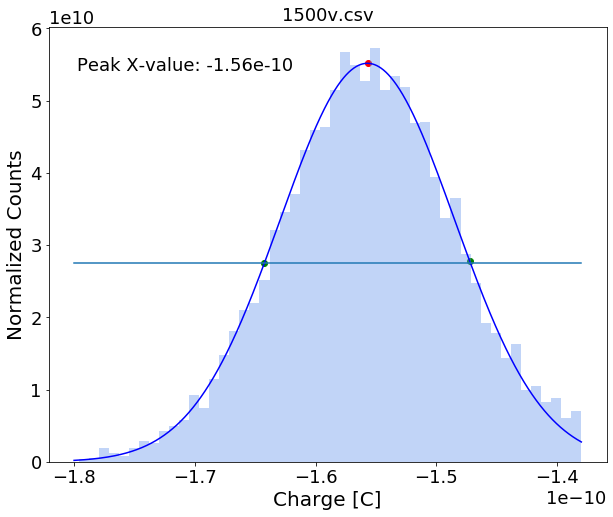

1500v.csv peak: -1.556996996996997e-10 fwhm: 1.6984984984984996e-11 resolution: -0.10908810368770258


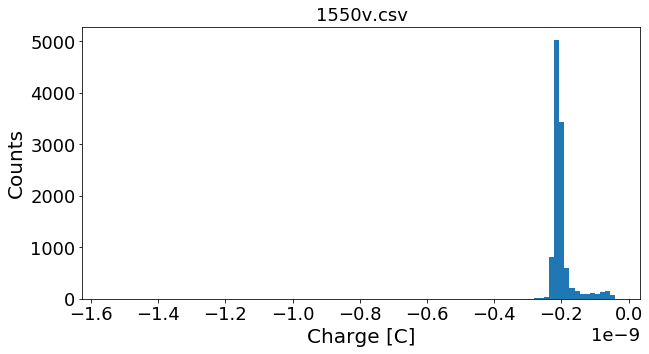

9650


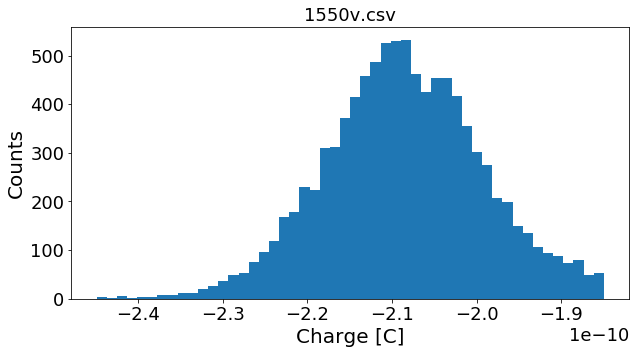

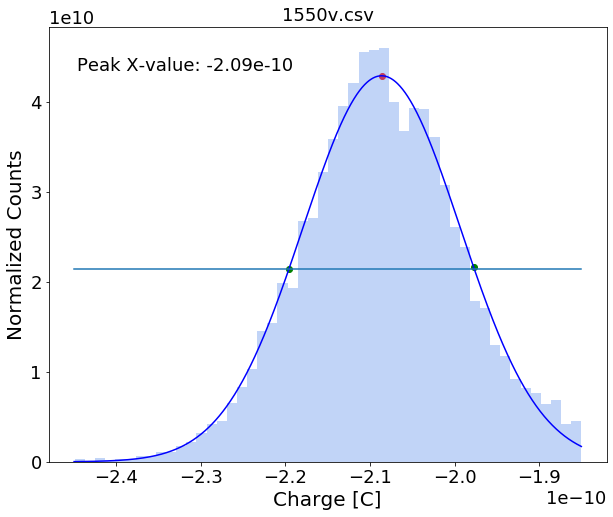

1550v.csv peak: -2.086036036036036e-10 fwhm: 2.1861861861861838e-11 resolution: -0.10480097891024245


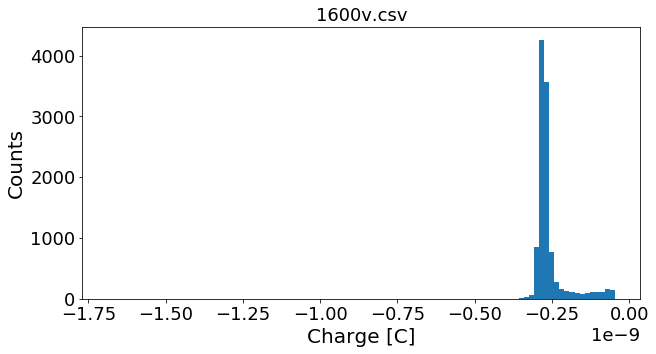

9319


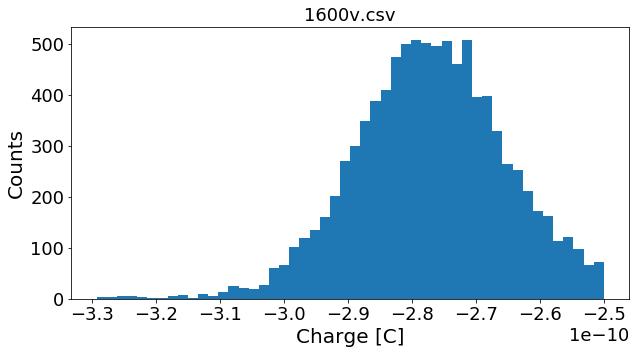

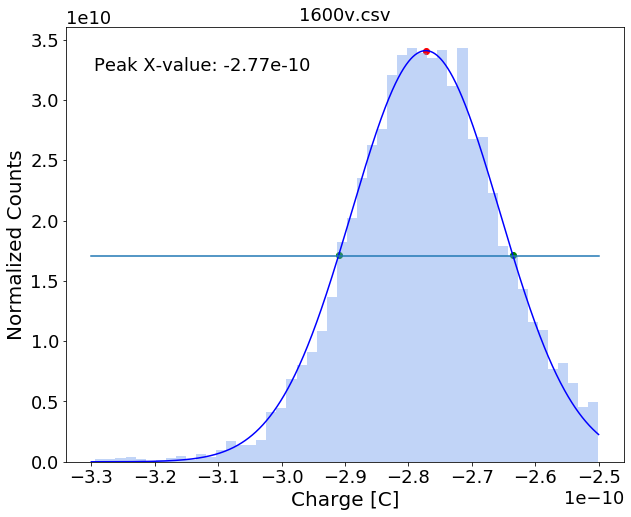

1600v.csv peak: -2.7722722722722725e-10 fwhm: 2.7467467467467502e-11 resolution: -0.09907925618342672


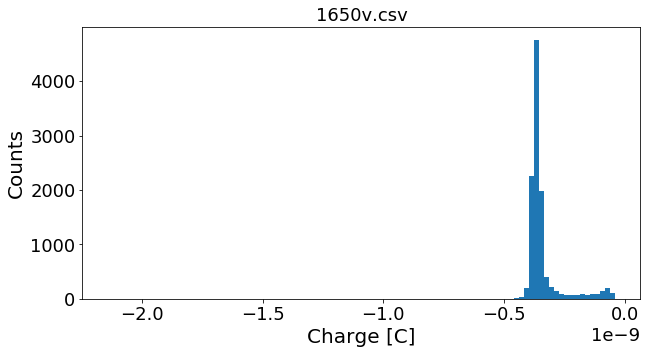

9320


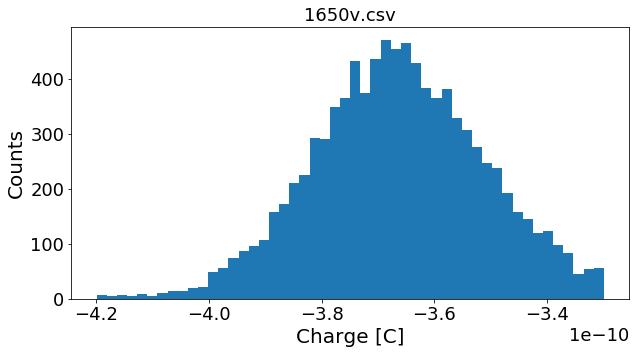

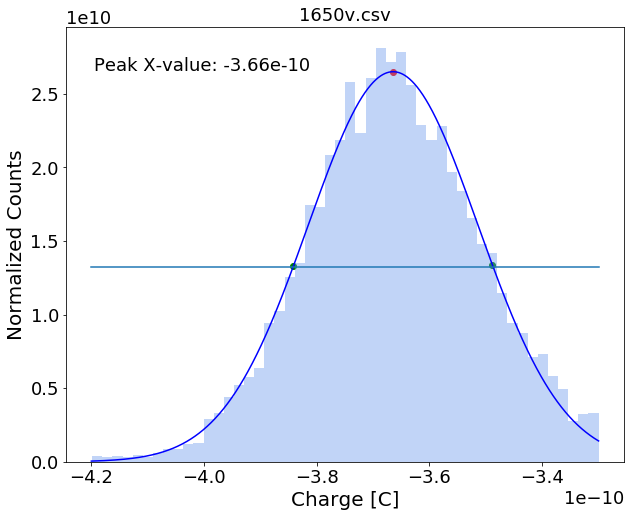

1650v.csv peak: -3.6648648648648647e-10 fwhm: 3.531531531531531e-11 resolution: -0.09636184857423793
8


ValueError: x and y must be the same size

<Figure size 432x288 with 0 Axes>

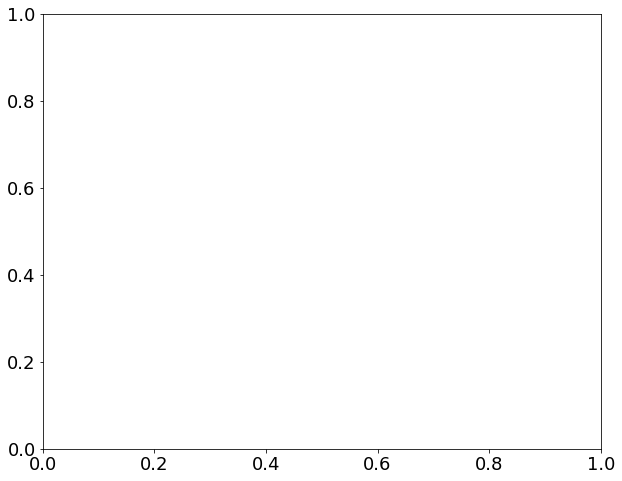

In [904]:

lowlims =[-0.7e-10, #1300
          -0.9e-10, #1350
          -1.1e-10, #1400
          -1.4e-10, #1450
          -1.8e-10, #1500
          -2.45e-10, #1550
          -3.3e-10, #1600
          -4.2e-10, #1650
          -3.4e-10,#1700
         -3.6e-8,#1750
         -2.5e-8,#1800
         -3.2e-8,#1850
         -3.8e-8,#1900
          0, #1950
         -5.3e-8,#2000
         0,#2050
         -6.8e-8] #2100

uplims = [ -0.3e-10,     #1300
          -0.57e-10, #1350
          -0.78e-10,   #1400
          -1.05e-10, #1450
          -1.38e-10, #1500
          -1.85e-10, #1550
          -2.5e-10, #1600
          -3.3e-10, #1650
          -2.5e-10, #1700
          -2.9e-8, #1750
         -1.98e-8, #1800
         -2.5e-8, #1850
         -3e-8, #1900
          0, #1950
         -4.5e-8,#2000
         0,#2050
         -5.95e-8] #2100

reses = []
fwds = []
pks = []
fw = 1

take_away = []

for i in range(0,17):
    num = 1300+50*i
#     if num in [1300,
#                1350,
#                1400,
#                1450,
#                1500,
#                1550,
#                1600,
#                1650,
#                1700,
#               1750,
#               1800,
#               1850,
#               1900,
#               2000]:
#         continue
        
    if num in [1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100]:
        continue
        
#     if num in [1700, 1750]:
#         filename = str(num)+"v.csv" #filenames for the loop
#         plotHistFromCsv(filename, bin_num =100)
#         tr_data = histData(filename, lowlims[i], uplims[i])
#         print(len(tr_data))

#         plotHist(tr_data, filename, 50)
#         res, fw, peak = normData(tr_data, lowlims[i], uplims[i], 50)

#         reses.append(res)
#         fwds.append(fw)
#         pks.append(peak)
#         continue
    
    if num < 1700:
        
        filename = str(num)+"v.csv" #filenames for the loop
    else:
        filename = str(num)+"v-a-3.csv"
    
    plotHistFromCsv(filename, bin_num =100)
    tr_data = histData(filename, lowlims[i], uplims[i])
    print(len(tr_data))

    plotHist(tr_data, filename, 50)
    res, fw, peak = normData(tr_data, lowlims[i], uplims[i],  filename, 50)

    reses.append(res)
    fwds.append(fw)
    pks.append(peak)
    if num < 1700:
        take_away.append(res)

print(len(take_away))
plt.clf()
plt.figure(figsize = (10,8))
  
plt.scatter([ 1300,1350, 1400, 1450, 1500,1550, 1600, 1650, 1750, 1800, 1850, 1900, 2000, 2100],
            reses) #1300,1350, 1400, 1450, 1500,1550, 1600, 1650,

plt.title("Energy Resolutions")
plt.xlabel("Voltage")

plt.ylabel("Resolution (FWHM/PeakValue)")

plt.show()

plt.clf()
plt.figure(figsize = (10,8))
  
plt.scatter([ 1300,1350, 1400, 1450, 1500,1550, 1600, 1650, 1750, 1800, 1850, 1900, 2000, 2100], fwds)

plt.title("Full Width Half Maximums")
plt.xlabel("Voltage")

plt.ylabel("FWHM [Vs]")
plt.ylim(4.5e-10, 3.5e-9)

plt.show()

plt.clf()
plt.figure(figsize = (10,8))
  
plt.scatter([ 1300,1350, 1400, 1450, 1500,1550, 1600, 1650, 1750, 1800, 1850, 1900, 2000, 2100], pks)

plt.title("Peak")
plt.xlabel("Voltage")

plt.ylabel("Peak [Vs]")
plt.ylim(-7e-8, -1.75e-9)

plt.show()

plt.clf()
plt.figure(figsize = (10,8))
#plotting all of the  graphs on one
tot_uplim = -1.75e-9
tot_lowlim = -2.7e-8
tot_uplim_a = -1e-8
tot_lowlim_a = -7e-8
plt.figure(figsize = (12,6))

for i in range(0,10):
    num = 1300+50*i
    filename = str(num)+"v.csv" #filenames for the loop
    
#     plotHistFromCsv(filename, bin_num =100)
    tr_data = histData(filename, tot_lowlim_a, tot_uplim)
    plt.hist(tr_data, bins = 100, alpha = 0.4, label = str(num)+"v")

#     res = normData(tr_data, tot_lowlim, tot_uplim, 50)

y_lowlim = 0
y_uplim = 5000
plt.ylim(y_lowlim,y_uplim)
plt.title("All voltages at 0.6A")
plt.xlabel("Area of the Signal [Vs]")
plt.ylabel("Counts")
plt.legend()
plt.show()


plt.clf()
plt.figure(figsize = (12,6))

for i in range(0,17):
    num = 1300+50*i
    if num < 1700 or num in [1950,2050]:
        continue
    
    filename = str(num)+"v-a.csv" #filenames for the loop
    
#     plotHistFromCsv(filename, bin_num =100)
    tr_data_a = histData(filename, tot_lowlim_a, tot_uplim)
    plt.hist(tr_data_a, bins = 100, alpha = 0.4, label = str(num)+"v")

#     res = normData(tr_data, tot_lowlim, tot_uplim, 50)
plt.ylim(y_lowlim,y_uplim)
plt.title("All voltages at 0.6A Attenuated signals")
plt.xlabel("Area of the Signal [Vs]")
plt.ylabel("Counts")
plt.legend()
plt.show()


    


In [ ]:
### dealing with the background

n_bins = 50

for f in [ "1500v", "1700v"]:
    plt.figure(figsize = (10,8))
    filename = f + ".csv"
    bkg_filename = f + "-bkg.csv"
    df = pd.read_csv(filename) #creates a dataframe of the csv
    data = np.array(df["Area"])
    tr_data = histData(filename, -0.3e-7, 0)
    

    
    bkg_df = pd.read_csv(bkg_filename) #creates a dataframe of the csv
    bkg_data = np.array(bkg_df["Area"])
    tr_bkg_data = histData(bkg_filename, -0.3e-7, 0)
        
    plt.hist(tr_data, bins = 50, alpha = 0.5, label = "observed")
    plt.hist(tr_bkg_data, bins = 50, alpha = 0.5, label = "background")

#     res = normData(tr_data, tot_lowlim, tot_uplim, 50)
    plt.title(f+ " with Background")
    plt.xlabel("Area of the Signal [Vs]")
    plt.ylabel("Counts")
    plt.legend()
    plt.show()
# #     plotHistFromCsv(filename+ "-bkg.csv")
# #     plotHistFromCsv(filename + ".csv")
#     bkg_counts, bkg_bins = bkgNormalize(filename + "-bkg.csv", bin_num = n_bins)
    
# #     bkgSubtractedData(filename + ".csv", bkg_counts, bkg_bins, bin_num = n_bins)

    
    

In [ ]:
plt.clf()
plt.figure(figsize = (10,8))
lows = []
lows_a = []

ups = []
ups_a = []

tot_uplim = -1.75e-9
tot_lowlim = -2.7e-8
tot_uplim_a = -1e-8
tot_lowlim_a = -7e-8

c_a = ["blue", "skyblue", "dodgerblue"]
c = ["brown", "red","tomato"]

i = 0
for num in [1700, 1750, 1800]:
    
#     num = 1300+50*i
#     if num in [1300,
#                1350,
#                1400,
#                1450,
#                1500,
#                1550,
#                1600,
#                1650,
# #                1700,
# #               1750,
# #               1800,
#               1850,
#               1900,
#               2000]:
#         continue
        
#     if num in [1950, 2050]:
#         continue
        

 
        
    filename = str(num)+"v.csv"
    
    filename_a = str(num)+"v-a.csv"
    
    
#     plotHistFromCsv(filename, bin_num =100)
    tr_data = histData(filename, tot_lowlim_a, tot_uplim)
    tr_data_a = histData(filename_a, tot_lowlim_a, tot_uplim)
    plt.hist(tr_data, bins = 100, alpha = 0.4, label = filename, color = c[i])
    plt.hist(tr_data_a, bins = 100, alpha = 0.4, label = filename_a, color = c_a[i])
    i+=1
    
#     print(len(tr_data))

#     plotHist(tr_data, filename, 50)
#     res, fw, peak = normData(tr_data, lowlims[i], uplims[i], 50)

#     reses.append(res)
#     fwds.append(fw)
#     pks.append(peak)
    
# plt.clf()
# plt.figure(figsize = (10,8))
  
# plt.scatter([ 1300,1350, 1400, 1450, 1500,1550, 1600, 1650, 1750, 1800, 1850, 1900, 2000, 2100],
#             reses) #1300,1350, 1400, 1450, 1500,1550, 1600, 1650,

# plt.title("Energy Resolutions")
# plt.xlabel("Voltage")


# tr_data_a = histData(filename, tot_lowlim_a, tot_uplim)
#     plt.hist(tr_data_a, bins = 100, alpha = 0.4, label = str(num)+"v")

# #     res = normData(tr_data, tot_lowlim, tot_uplim, 50)
# plt.ylim(y_lowlim,y_uplim)
plt.title("All voltages at 0.6A Attenuated signals")
plt.xlabel("Area of the Signal [Vs]")
plt.ylabel("Counts")
plt.legend()
plt.show()

In [ ]:
lows = [-2.8e-8,#1700
       -3.6e-8,#1750
       -4.5e-8] #1800
ups = [-2.2e-8,#1700
      -2.9e-8, #1750
      -3.8e-8] #1800

lows_a = [-1.7e-8,#1700
       -2e-8,#1750
       -2.5e-8] #1800
ups_a = [-1.25e-8,#1700
      -1.6e-8, #1750
      -2e-8] #1800

lows_a_1 = [-1.4e-8,#1700
       -1.75e-8]#1750

ups_a_1 = [-1.0e-8,#1700
      -1.4e-8] #1750

lows_a_2 = [-1.3e-8,#1700
       -1.75e-8]#1750

ups_a_2 = [-0.95e-8,#1700
      -1.35e-8] #1750
i = 0

reses= []
fwds= []
pks= []
reses_a= []
fwds_a= []
pks_a= []
reses_a_1= []
fwds_a_1= []
pks_a_1= []
reses_a_2= []
fwds_a_2= []
pks_a_2= []
for num in [1700, 1750, 1800]:
    
    
        
    filename = str(num)+"v.csv"
    
    plotHistFromCsv(filename, bin_num =100)
    tr_data = histData(filename, lows[i], ups[i])
    plotHist(tr_data, filename, 50)
    res, fw, peak = normData(tr_data, lows[i], ups[i],filename, 50)
    reses.append(res)
    fwds.append(fw)
    pks.append(peak)
    
    #-----------------------
    
    filename_a = str(num)+"v-a.csv"
    
    plotHistFromCsv(filename_a, bin_num =100)
    tr_data_a = histData(filename_a, lows_a[i], ups_a[i])
    res_a, fw_a, peak_a = normData(tr_data_a, lows_a[i], ups_a[i],filename_a,  50) 
    reses_a.append(res_a)
    fwds_a.append(fw_a)
    pks_a.append(peak_a)
    
    #-----------------------
    if num in [1700, 1750]:
        filename_a_1 = str(num)+"v-a-1.csv"

        plotHistFromCsv(filename_a_1, bin_num =100)
        tr_data_a_1 = histData(filename_a_1, lows_a_1[i], ups_a_1[i])
        res_a_1, fw_a_1, peak_a_1 = normData(tr_data_a_1, lows_a_1[i], ups_a_1[i],filename_a_1,  50) 
        reses_a_1.append(res_a_1)
        fwds_a_1.append(fw_a_1)
        pks_a_1.append(peak_a_1)
        
        #-----------------------
        
        filename_a_2 = str(num)+"v-a-2.csv"

        plotHistFromCsv(filename_a_2, bin_num =100)
        tr_data_a_2 = histData(filename_a_2, lows_a_2[i], ups_a_2[i])
        res_a_2, fw_a_2, peak_a_2 = normData(tr_data_a_2, lows_a_2[i], ups_a_2[i],filename_a_2,  50) 
        reses_a_2.append(res_a_2)
        fwds_a_2.append(fw_a_2)
        pks_a_2.append(peak_a_2)
    
    i+=1
    
    
plt.clf()
plt.figure(figsize = (10,8))
  
plt.scatter([ 1700, 1750, 1800], reses, c= "red", label = "NOT attenuated")
plt.scatter([ 1700, 1750, 1800], reses_a, c= "blue", label = "attenuated")
plt.scatter([ 1700, 1750], reses_a_1, c= "gray", label = "attenuated 1")
plt.scatter([ 1700, 1750], reses_a_2, c= "black", label = "attenuated 2")
plt.scatter([ 1300,1350, 1400, 1450, 1500,1550, 1600, 1650], take_away, color = "green", label = "previous data")


plt.title("Energy Resolutions")
plt.xlabel("Voltage")
plt.legend()
plt.ylabel("Resolution (FWHM/PeakValue)")

plt.show()
    
    


8


<Figure size 432x288 with 0 Axes>

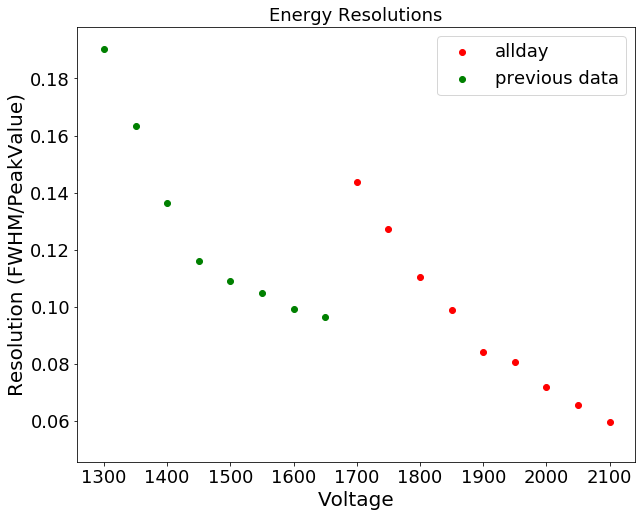

In [905]:
print(len(take_away))
plt.clf()
plt.figure(figsize = (10,8))
  
plt.scatter([ 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100], reses_allday, c= "red", label = "allday")
plt.scatter([ 1300,1350, 1400, 1450, 1500,1550, 1600, 1650], take_away, color = "green", label = "previous data")


plt.title("Energy Resolutions")
plt.xlabel("Voltage")
plt.legend()
plt.ylabel("Resolution (FWHM/PeakValue)")

plt.show()